In [1]:
from PulseBlasterUSB import *

In [2]:
pulseblaster = PulseBlasterUSB()

## Sequence Construction
This section demonstrates how to build a sequence into the buffer and how to read the output after it is constructed.

To construct a pulse sequence, you need 3 lists:
- Channel List
    - Lists the channels (in integer form) desired to be used in the order corresponding to the Duration and Level lists.
- Duration List
    - Tells you the diration (in seconds) of the pulse in the list corresponding to a channel.
- Level List
    - Tells you if the listed instruction corresponding to the diration list should be on (1) or off (0).

In [3]:
#Pulse sequence lists
channels = [0, 1, 4]
durations = [[1e-3, 1e-3], [500e-6, 500e-6, 500e-6, 500e-6], [500e-6, 500e-6, 500e-6, 500e-6]]
levels = [[1, 0], [1, 0, 1, 0], [0, 1, 0, 1]]
#durations = [[1e-3, 1e-3], [500e-6, 500e-6, 500e-6, 250e-6, 250e-6], [500e-6, 500e-6, 500e-6, 500e-6]]
#levels = [[1, 0], [1, 0, 1, 0, 0], [0, 1, 0, 1]]
#This is the core command used to optimize a pulse sequence. This will remove 
instructions = pulseblaster.get_Instructions(channels, durations, levels)
instructions

[[3, 17, 2, 16], [0, 0, 0, 6], [0, 0, 0, 0], [0.0005, 0.0005, 0.0005, 0.0005]]

Note that there are now 4 lists. The 2nd and 3rd are the instruction and argument list. Instruction 0 means it is continuous and 6 means branching. There are a number of other options, but these suffice in line to always make a functioning set of pulses. The arguments suffice as 0 for our purposes (not really sure what they do).

The more important components are the 1st and 4th lists, which are the channels and durations, respectively. In the channel list, we get a number that maps to the channels used as a bionary string. For example, 48 = 110000, so channels 0-3 are inactive but channels 4 and 5 are active. This allows us to map multiple channels to the given duration. The duration list tells us how long, in seconds, the corresponding channel index will be active for.

Note that if you use the longer levels and durations list, where 2 zeros are used in a row, we see that the output is identical. This is due to the pulse optimization build into the program that's designed to recognize and combine any commands with non-alternating levels, allowing for further optimazation/minimization of the pulse train.

As shown below, you can also graph this.

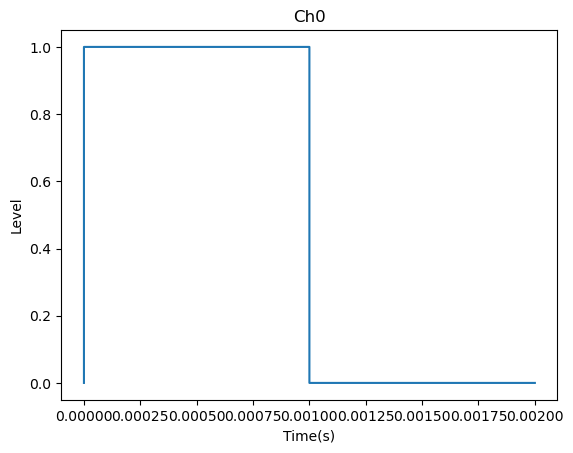

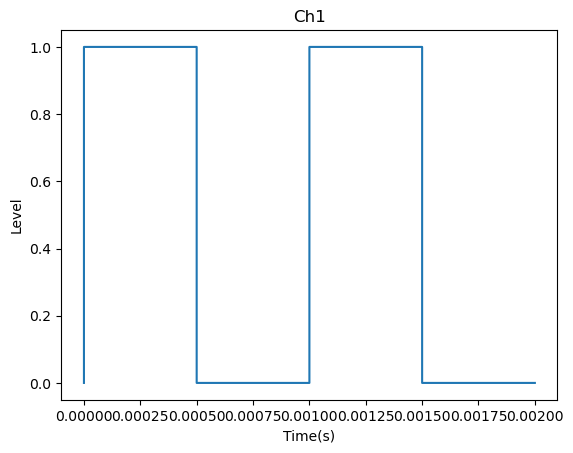

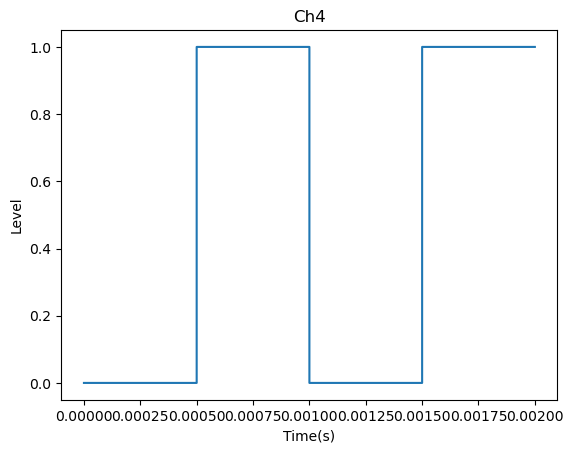

In [4]:
pulseblaster.Plot_Sequence(instructions)

To run a sequence directly, use:

In [5]:
pulseblaster.Run_Sequence(instructions)

In [6]:
pulseblaster.Stop()

## Combining Sequences and Looping
This is made easy in this program. For example, suppose I want to make a new sequence combining the following 2 pulse sequences:

In [ ]:
#Pulse sequence lists
channels = [4, 5, 6]
durations = [[1e-3], [500e-6, 500e-6], [500e-6, 500e-6]]
levels = [[1], [1, 0], [0, 1]]
instruction1 = pulseblaster.get_Instructions(channels, durations, levels)
pulseblaster.Plot_Sequence(instruction1)

In [ ]:
#Pulse sequence lists
channels = [4, 5, 6]
durations = [[1e-3], [500e-6, 500e-6], [500e-6, 500e-6]]
levels = [[0], [0, 1], [1, 0]]
instruction2 = pulseblaster.get_Instructions(channels, durations, levels)
pulseblaster.Plot_Sequence(instruction2)

In [ ]:
pulseblaster.Run_Sequence(instruction1)

To combine these 2, we would do this below.
Sequence list is the list of sequences you want to combine and action list is the order of the instructions to apply.

In [ ]:
sequence_list = [instruction1, instruction2]
action_list = [0, 1]
sequence1 = pulseblaster.New_Sequence(sequence_list, action_list)
pulseblaster.Plot_Sequence(sequence1)
pulseblaster.Run_Sequence(sequence1)

Alternatively, we could do this in a different order, but it will give the same resultant sequence. More interesting is:

In [ ]:
sequence_list = [instruction1, instruction2]
action_list = [1, 0, 0, 1]
sequence2 = pulseblaster.New_Sequence(sequence_list, action_list)
pulseblaster.Plot_Sequence(sequence2)
pulseblaster.Run_Sequence(sequence2)

This can be written in the equivalent loop structure:

In [ ]:
sequence_list = [instruction1, instruction2]
action_list = [1, [0, 7], 1]
sequence2 = pulseblaster.New_Sequence(sequence_list, action_list)
pulseblaster.Plot_Sequence(sequence2)
pulseblaster.Run_Sequence(sequence2)

All the above can be done directly saving instructions lists, but there is also a buffer list and a temperary buffer list for tracking, indexing, running, and creating sequences.

## Temp and Buffer Lists
While you can handle the pulse sequences directly, there are also 2 sequence managing lists built into the control program: Temp and Buffer. Making a new sequence and chosing it's saved location is almost the same as before, but we use a B or b to save to the buffer list and a T or t to save to the temparary list. This will return the index of the buffer that the seqeunce was saved to. For example:

In [ ]:
#Pulse sequence lists
channels = [4, 5, 6]
durations = [[1e-3, 1e-3], [500e-6, 500e-6, 500e-6, 500e-6], [500e-6, 500e-6, 500e-6, 500e-6]]
levels = [[1, 0], [1, 0, 1, 0], [0, 1, 0, 1]]

temp1 = pulseblaster.get_Instructions(channels, durations, levels, "B")
#pulseblaster.Plot_Sequence(pulseblaster.get_Buffer_Sequence(temp1))

buffer1 = pulseblaster.get_Instructions(channels, durations, levels, "t")
#pulseblaster.Plot_Sequence(pulseblaster.get_Temp_Sequence(buffer1))

So far everything should be familier. The added bonus comes with these buffers in the ability to save and index to the directory as well as and create new pulse sequences from temporary or buffer stored sequences.

In [ ]:
channels = [4, 5, 6, 7]
durations = [[1e-3, 1e-3], [500e-6, 500e-6, 500e-6, 500e-6], [500e-6, 500e-6, 500e-6, 500e-6], [2e-3]]
levels = [[0, 1], [0, 1, 0, 1], [1, 0, 1, 0], [1]]

temp2 = pulseblaster.get_Instructions(channels, durations, levels, "B")
#pulseblaster.Plot_Sequence(pulseblaster.get_Buffer_Sequence(temp2))

buffer2 = pulseblaster.get_Instructions(channels, durations, levels, "t")
#pulseblaster.Plot_Sequence(pulseblaster.get_Temp_Sequence(buffer2))

So to combine these, we use the same instruction structure we used last time, but we use the indicies of the sequence in the buffer. Remember that temp1 and temp2 correspond to the index that the sequence was saved to the temp buffer. By inputting "B" we are telling it to save the new sequence to the buffer. However, we can use "T" to save to the temperary buffer. If you don't at a "B" or a "T" to the end, this will just return the sequence in the form shown above.

In [ ]:
temp3 = pulseblaster.New_Sequence_From_Buffer([buffer1, buffer2], "T")
#pulseblaster.Plot_Sequence(pulseblaster.get_Temp_Sequence(temp3))
#Note that there is not seperate way to run a temporary storage sequence then retreiving it, as it's not the standard use.
pulseblaster.Run_Sequence(pulseblaster.get_Temp_Sequence(temp3))

buffer3 = pulseblaster.New_Sequence_From_Temp([temp1, temp2], "b")
#pulseblaster.Plot_Sequence(pulseblaster.get_Buffer_Sequence(buffer3))
pulseblaster.Run_Buffer_Sequence(buffer3)

Similarly to working directly with the sequences, we can use loops to get a sequence that's a compilation of other sequences.

In [ ]:
buffer4 = pulseblaster.New_Sequence_From_Temp([temp1, [temp2, 2], [temp1, 3], temp2], "B")
pulseblaster.Plot_Sequence(pulseblaster.get_Buffer_Sequence(buffer4))
pulseblaster.Run_Buffer_Sequence(buffer4)

## Other Commands Included in the Program

Delete an index of the buffer and temperary sequence lists. Note that this can invalidate previously saved indicies, so track accordingly.

In [ ]:
pulseblaster.Temp_Delete(temp3)
pulseblaster.Buffer_Delete(buffer4)

You can add sequences directly to the buffer or temperary sequence lists either at the end or at a specific index.

In [ ]:
pulseblaster.Temp_Add(sequence1)
pulseblaster.Buffer_Add(sequence2)

You can tell the program to replace the sequence in a specific index with a new sequence.

In [ ]:
pulseblaster.Temp_Replace(sequence2, temp1)
pulseblaster.Buffer_Replace(pulseblaster.get_Temp_Sequence(temp1), buffer1)

While you've seen get_Temp_Sequence and get_Buffer_Sequence, which are used to retreive the sequence stored at a specific index within the temporary sequence and buffer sequence lists respectively, you can also retreive the list of sequences contained in Temp and Buffer using these commands.

In [ ]:
pulseblaster.get_Temp()
pulseblaster.get_Buffer()

While this was originally designed as a component of the Plot Channels list, you can also determine the channels used in a pulse sequence with the following command.

In [ ]:
pulseblaster.List_Channels_Used(sequence1)
pulseblaster.List_Channels_Used(pulseblaster.get_Temp_Sequence(temp3))